# gamba testing notebook

In [69]:
import importlib, sys, matplotlib.pyplot as plt, pandas as pd
sys.path.append('/home/ojs/Dropbox/phd/code/python/gamba')
import gamba as gb
plt.style.use('../../gamba/gamba_plot_style.mplstyle')
importlib.reload(gb)

la_gamba_measures = gb.read_csv('la_labrie_measures.csv')
print('gamba LA measures loaded:', len(la_gamba_measures))


gamba loaded, see https://gamba.dev/citation


FileNotFoundError: [Errno 2] File b'la_labrie_measures.csv' does not exist: b'la_labrie_measures.csv'

# Agglomerative Clustering Test Area

In [6]:
# plot the top three levels of the dendrogram
measures = la_gamba_measures[:10000]
zmeasures = zscore_measures(measures)
t4_model = gb.agglomerative_cluster(zmeasures, distance_threshold=None, n_clusters=4)
zmeasures['cluster_id'] = t4_model.labels_
full_model = gb.agglomerative_cluster(zmeasures, distance_threshold=0, n_clusters=None)
print('fin')

fin


<module 'matplotlib.pyplot' from '/usr/lib/python3.8/site-packages/matplotlib/pyplot.py'>

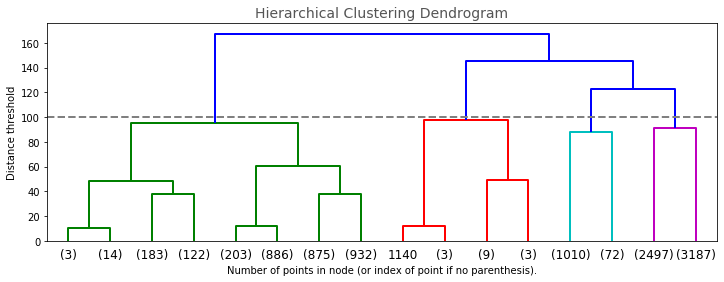

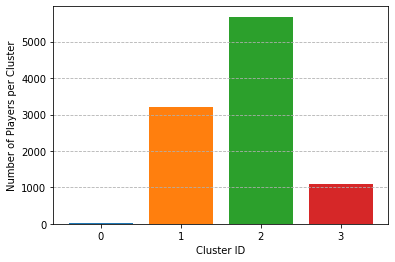

In [7]:
gb.plots.plot_agglomeration_dendrogram(full_model, dt_cutoff=100)
gb.plot_cluster_sizes(t4_model)

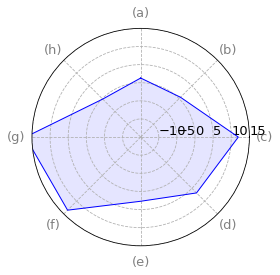

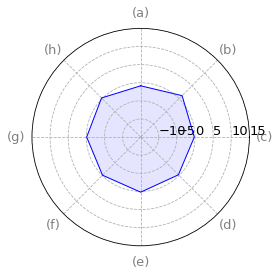

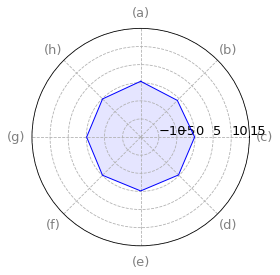

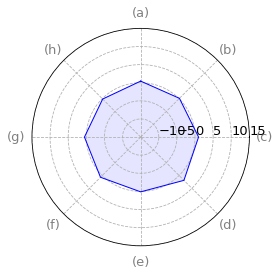

In [9]:
player_groups = gb.get_labelled_groups(zmeasures, 'cluster_id')

for i, group in enumerate(player_groups):
    colnames = list(group.columns[1:-1])
    means = [group[x].mean() for x in colnames]
    #medians = [group[x].median() for x in colnames]
    lim = 15
    gb.plot_radar(colnames, means, lims=[-lim,lim])


# Clustering Ensemble Tests

In [1]:
import random, string, pandas as pd, datetime

def create_dummy_bets(players=100, min_bets=30, max_bets=200):
    
    df = pd.DataFrame()
    
    id_vals = []
    time_vals = []
    size_vals = []
    payout_vals = []
    
    
    player_ids = []
    for player in range(players):
        fake_id = ''.join(random.choice(string.ascii_letters + string.digits) for x in range(8))
        player_ids.append(fake_id)
        
    for player in player_ids:
        num_bets = random.randrange(min_bets, max_bets)
        start_datetime = datetime.datetime(2020,1,1) + datetime.timedelta(minutes=random.randrange(1,10000))
        
        for bet in range(num_bets):
            start_datetime = start_datetime + datetime.timedelta(seconds=random.randrange(1,120))
            id_vals.append(player)
            time_vals.append(start_datetime)
            bet_size = random.randrange(100,1500) / 100
            size_vals.append(bet_size)
            
            if bool(random.getrandbits(1)):
                payout_vals.append(bet_size * 2)
            else:
                payout_vals.append(0)
            
    df['player_id'] = id_vals
    df['bet_time'] = time_vals
    df['bet_size'] = size_vals
    df['payout_size'] = payout_vals
    
    return df.sort_values(by='bet_time')

df = create_dummy_bets()
    

In [2]:
def Atest(dist1, dist2):
    ''' 
    Implementation of Vargha-Delaney's A test, a non-parametric
    effect magnitude test. The distributions may be of different
    sizes in this implementation. 
    '''
    equal = 0.0
    greater = 0.0
    for x in dist1:
        for y in dist2:
            if x == y : equal += 1
            elif x > y : greater += 1
    # multiplication of the number of samples in each distribution
    nm = len(dist1) * len(dist2)
    return (greater / nm) + ((0.5 * equal) / nm)


Atest(df['bet_size'].values[:400], df['payout_size'].values[:400])

0.58510625

In [4]:
import numpy as np, gamba as gb
def vargha_delaney_a(measures_table, loud=False):

    measure_names = list(measures_table.columns)[1:]

    data = []
    for column in measure_names:
        data.append(measures_table[column].values)

    labels = measure_names

    coefs = []
    for toprow in data:
        for siderow in data:
            coef = Atest(toprow, siderow)
            coefs.append(coef)

    coefs = np.array(coefs)
    # reshape as matrix
    coef_as_matrix = coefs.reshape(len(data), len(data))
    # cut off top-diagonal elements
    coef_as_matrix = np.tril(coef_as_matrix, -1)

    coef_df = pd.DataFrame(coef_as_matrix, columns=labels, index=labels)

    coef_df.replace(0, '', inplace=True)
    np.fill_diagonal(coef_df.values, '-')

    return coef_df

mt = gb.data.dummy_measures_table()
vargha_delaney_a(mt)

thank you for using gamba!


,duration,frequency,total_wagered,num_bets
duration,-,,,
frequency,0.80085,-,,
total_wagered,0.9944,0.9693,-,
num_bets,0.99215,0.91015,0.1516,-
